**<center><font size=6>CS490: Machine Learning<br>Homework 3</font></center>**

<hr>

# Part 1: Linear Regression (60 points)

For this problem we will fit linear regression models that minimize the *mean squared error* (MSE).

## Preparing the Data

Load the `data/curve80.txt` data set, and split it into 75% / 25% training/test. The first column is the scalar feature value x; the second column data[:,1] is the target value y for each example. For consistency in our results, ***do not reorder (shuffle)*** the data (they’re already in a random
order), and use the first 75% of the data for training and the rest for testing.

In [2]:
# TODO: Load your data into a matrix called data
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
data = np.genfromtxt("data/curve80.txt",delimiter=None)
# Set up training and test sets
X = data[:,0]
print(Y)
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1]
Xtrain,Xtest,Ytrain,Ytest = ml.splitData(X,Y,0.75) # split data set 75/25

[-0.88011696  0.46491228  3.7397661   3.0087719   2.9210526   4.1491228
  3.3888889   3.7105263   2.9795322   3.9736842   0.11403509  4.1491228
 -0.5         4.0906433   2.8040936  -0.5        -1.494152    4.0321637
 -0.76315789  4.4122807   1.0204678   3.0087719  -0.6754386   0.37719298
  4.6461988   4.1491228  -1.4649123   2.1023392   4.0321637  -0.99707602
  1.8976608   0.58187135 -0.76315789  4.9385965   3.4473684   2.8625731
  2.1023392   3.5935673  -0.76315789 -0.64619883  4.7046784  -1.3187135
  1.7222222  -0.99707602  4.5584795   5.1432749  -1.0263158   1.5467836
  2.4532164   4.1783626   3.622807    0.78654971  4.4707602  -1.2309942
 -0.96783626  2.8333333  -0.29532164 -1.0847953   1.6345029   2.8625731
  2.3070175   3.7982456  -0.99707602 -0.47076023  4.1491228   3.4766082
 -0.93859649 -0.11988304  3.7982456   2.6871345   3.5643275   4.5292398
  0.66959064 -1.2309942   0.34795322  4.1783626   3.0380117  -1.0847953
  6.1959064   3.0964912 ]


**Print the shapes of these objects. <span style="color: deepskyblue;">(5 points)</span>**

In [3]:
# TODO: Print the shapes of the training and validation data
print("Ytrain dimensions: ",Ytrain.shape)
print("Xtrain dimensions: ",Xtrain.shape)
print("Ytest dimensions: ",Ytest.shape)
print("Xtest dimensions: ",Xtest.shape)
print("Matrix dimensions:", data.shape)





Ytrain dimensions:  (60,)
Xtrain dimensions:  (60, 1)
Ytest dimensions:  (20,)
Xtest dimensions:  (20, 1)
Matrix dimensions: (80, 2)


## Linear Regression Learning
Use the provided `linearRegress` class in `mltools` to create a linear regression predictor of y given x. You can plot the resulting function by simply evaluating the model at a large number of x values and plotting the resulting ys:

In [5]:
lr = ml.linear.linearRegress( Xtrain, Ytrain ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code) 
print(Xtrain.shape)
print("Theta shape:", lr.theta.shape)
ys = lr.predict( xs ) # make predictions at xs
print(ys)

(60, 1)
Theta shape: (1, 2)
[[-2.82765049]
 [-2.78563696]
 [-2.74362344]
 [-2.70160991]
 [-2.65959639]
 [-2.61758286]
 [-2.57556933]
 [-2.53355581]
 [-2.49154228]
 [-2.44952876]
 [-2.40751523]
 [-2.36550171]
 [-2.32348818]
 [-2.28147465]
 [-2.23946113]
 [-2.1974476 ]
 [-2.15543408]
 [-2.11342055]
 [-2.07140703]
 [-2.0293935 ]
 [-1.98737997]
 [-1.94536645]
 [-1.90335292]
 [-1.8613394 ]
 [-1.81932587]
 [-1.77731235]
 [-1.73529882]
 [-1.6932853 ]
 [-1.65127177]
 [-1.60925824]
 [-1.56724472]
 [-1.52523119]
 [-1.48321767]
 [-1.44120414]
 [-1.39919062]
 [-1.35717709]
 [-1.31516356]
 [-1.27315004]
 [-1.23113651]
 [-1.18912299]
 [-1.14710946]
 [-1.10509594]
 [-1.06308241]
 [-1.02106889]
 [-0.97905536]
 [-0.93704183]
 [-0.89502831]
 [-0.85301478]
 [-0.81100126]
 [-0.76898773]
 [-0.72697421]
 [-0.68496068]
 [-0.64294715]
 [-0.60093363]
 [-0.5589201 ]
 [-0.51690658]
 [-0.47489305]
 [-0.43287953]
 [-0.390866  ]
 [-0.34885247]
 [-0.30683895]
 [-0.26482542]
 [-0.2228119 ]
 [-0.18079837]
 [-0.1387848

**Plot the training data points along with your prediction function in a single plot. <span style="color: deepskyblue;">(5 points)</span>**

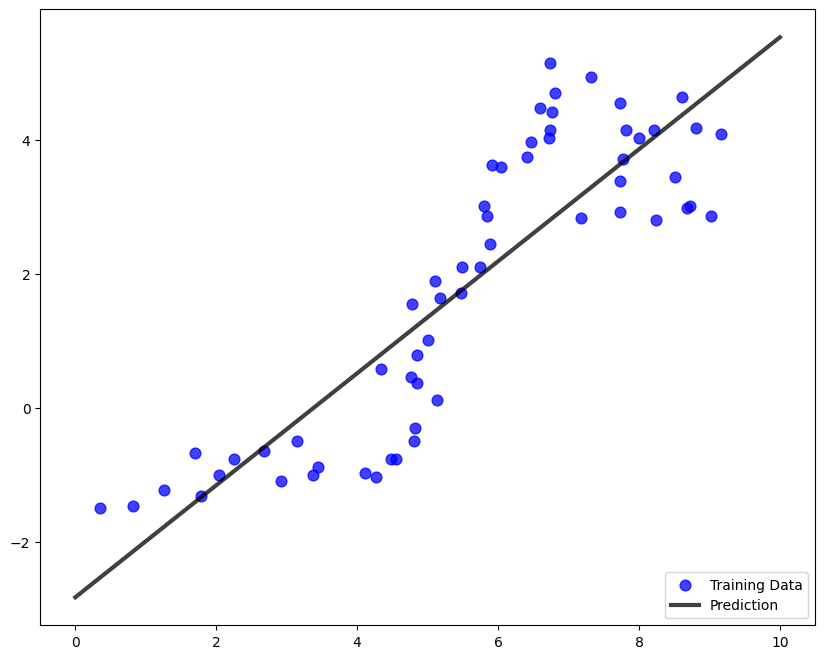

In [5]:
# TODO: plot of training data and prediction function
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(Xtrain, Ytrain, s=60, color='blue', alpha=0.75, label='Training Data')
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')
ax.legend(fontsize=10, loc=4)





**Print the linear regression coefficients (`lr.theta`) and verify that they match your plot. <span style="color: deepskyblue;">(5 points)</span>**

In [6]:
# TODO: print out the regression parameters
print(lr.theta)




[[-2.82765049  0.83606916]]


**What is the mean squared error of the predictions on the training and test data? Fill in the function below and use to it compute the MSE.  <span style="color: deepskyblue;">(15 points)</span>**

In [7]:
# Function to compute the MSE
def MSE(y_true, y_hat):
    index = 0
    count = 0
    total = 0
    for true in y_true:
        diff = y_true[index] - y_hat[index]
        diff = float(diff[0] * diff[0])
        total += diff
        count += 1
        index +=1
    return total/count
    
# Use this function to compute MSE
ys = lr.predict(Xtrain)
print("MSE (Train) = ", MSE(Ytrain,ys))

ys = lr.predict(Xtest)
print("MSE (Test)  = ", MSE(Ytest,ys))

MSE (Train) =  1.127711955609391
MSE (Test)  =  2.242349203010125


You can check your previous answer by using the built-in `mse` function in `mltools`.

In [8]:
print("MSE (Train) = ", lr.mse(Xtrain,Ytrain))
print("MSE (Test)  = ", lr.mse(Xtest,Ytest))

MSE (Train) =  1.127711955609391
MSE (Test)  =  2.242349203010125


<hr>

## Regression with Higher Degree Polynomials
Try fitting y = f(x) using a polynomial function f(x) of increasing order. Do this by the trick of adding additional polynomial features before constructing and training the linear regression object. You can do this easily yourself; you can add a quadratic feature of `Xtrain` with:

In [9]:
Xtrain2 = np.zeros( (Xtrain.shape[0],2) ) # create Mx2 array to store features 
Xtrain2[:,0] = Xtrain[:,0]                # place original "x" feature as X1
Xtrain2[:,1] = Xtrain[:,0]**2             # place "x^2" feature as X2
# Now, Xtrain2 has two features about each data point: "x" and "x^2"

(You can also add the all-ones constant feature in a similar way, but this is currently done automatically within the learner’s train function.) A function `ml.transforms.fpoly` is also provided to more easily create such features. Note, though, that the resulting features may include extremely large values; if x ≈ 10, then x^10 is extremely large. For this reason (as is often the case with features on very different scales) it’s a good idea to **rescale the features**, that is to make sure that the range (the min and the max) and the variance (the spread) are similar across all the features. You can do this manually by computing multipliers for each variable to regularize their values (see https://en.wikipedia.org/wiki/Feature_scaling for some methods) or use the provided function in mltools:

In [10]:
# Create polynomial features up to "degree"; don't create constant feature
# (the linear regression learner will add the constant feature automatically) 
degree = 2
XtrainP = ml.transforms.fpoly(Xtrain, degree, bias=False)

# Rescale the data matrix so that the features have similar ranges / variance
XtrainP,params = ml.transforms.rescale(XtrainP)

# "params" returns the transformation parameters (shift & scale)
# Then we can train the model on the scaled feature matrix:
lr = ml.linear.linearRegress( XtrainP, Ytrain ) # create and train model

# Now, apply the same polynomial expansion & scaling transformation to Xtest:
XtestP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xtest,degree,bias = False), params)

The transformations used to create features of the training data may depend on properties of that data (such as rescaling the data to have mean zero and variance one). For our learned predictions to be consistent, we need to apply the same transform to new test data, so that it will be represented consistently with the training data. “Feature transform” functions like `rescale` are written to output their parameters (here `params = (mu,sig)`,a tuple containing the mean and standard deviation used to shift and scale the data) so that they can be reused on subsequent data. When evaluating a polynomial regression model, be sure that the same rescaling and polynomial expansion is applied to both the training and test data.

**Train polynomial regression models of degree d = 1, 3, 5, 7, 10, 15, 18, and:**

**(a) For each model, plot the learned prediction function f(x).  <span style="color: deepskyblue;">(15 points)</span>**

**(b) Plot the training and test errors on a log scale ( semilogy ) as a function of the model degree.  <span style="color: deepskyblue;">(10 points)</span>**

**(c) What polynomial degree do you recommend?  <span style="color: deepskyblue;">(5 points)</span>**

When plotting prediction functions in part (a), you should set all plots to have the same vertical axis limits as the d = 1 regression model. Otherwise, high-degree polynomials may appear flat due to taking on extremely large values for a subset of inputs. Here is some example code:

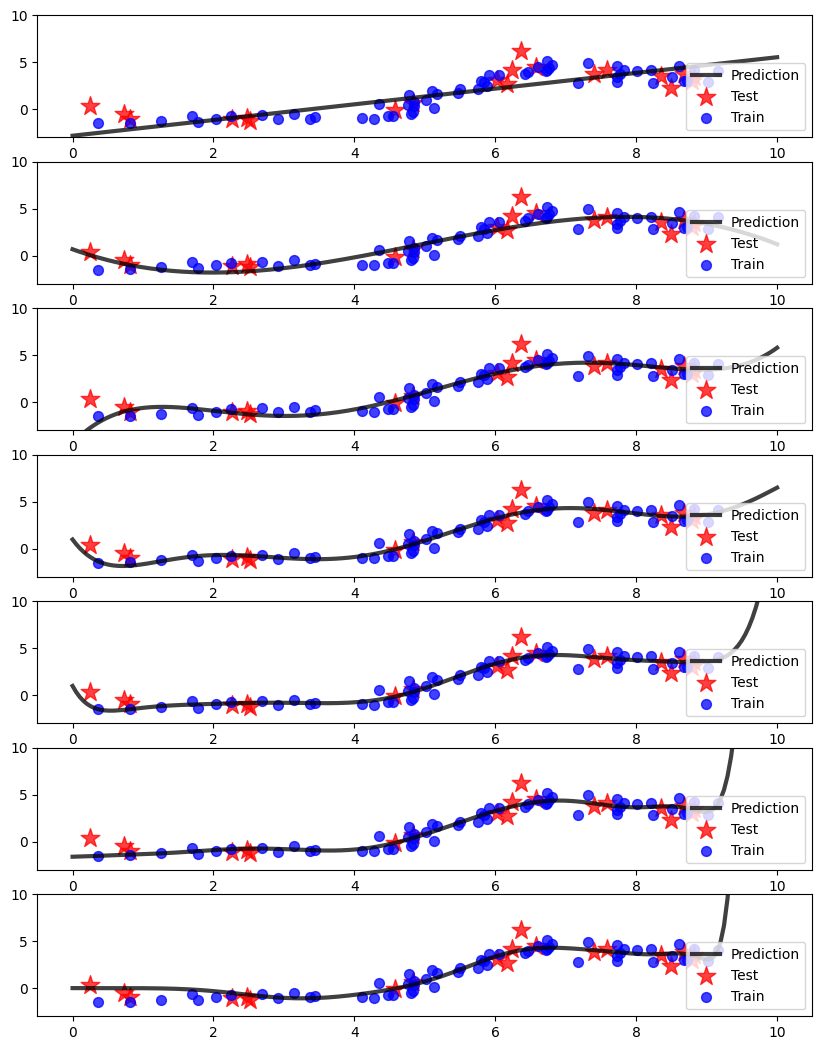

In [11]:
# TODO: Train and plot polynomials for d = 1, 3, 5, 7, 10, 15, 18
# PART A
#degrees = [1, 3, 5, 7, 10, 15, 18]
degrees = [1, 3, 5, 7, 10, 15, 18]
fig, ax = plt.subplots(7, 1, figsize=(10, 13)) # Create axes for single subplot 
for i, deg in enumerate(degrees):
    X, Y = np.atleast_2d(data[:, 0]).T, data[:, 1]
    Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)
    XtrP = ml.transforms.fpoly(Xtr, deg, False)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    # Make sure you use the currect space.
    xs = np.linspace(0, 10, 200)
    xs = np.atleast_2d(xs).T
    # Notice that we have to transform the predicting xs too.
    xsP = ml.transforms.fpoly(xs, deg, False)
    ys = lr.predict(xsP)
    # ax.set_ylim(..., ...) # Set the minimum and maximum limits
    ax[i].set_ylim(-3,10)
    ax[i].plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')
    ax[i].scatter(Xte, Yte, s=200, marker='*', color='red', alpha=0.75, label='Test')
    ax[i].scatter(Xtr, Ytr, s=50, color='blue', alpha=0.75, label='Train')
    ax[i].legend(fontsize=10, loc=4)
plt.show()

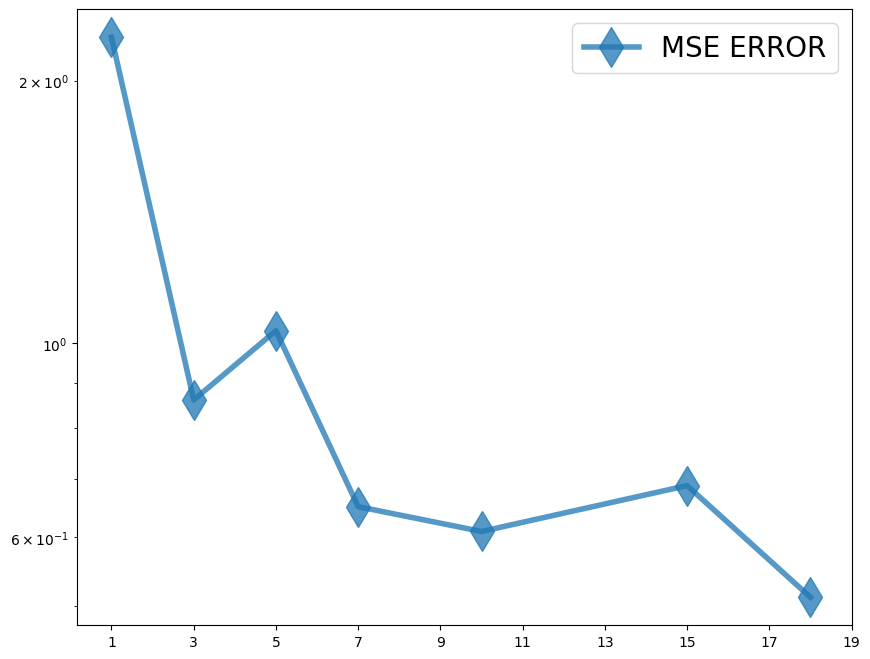

In [12]:

f, ax = plt.subplots(1, 1, figsize=(10, 8))
mse_error =  [None] * len(degrees)
#degrees = [1, 3, 5, 7, 10, 15, 18]
for i, deg in enumerate(degrees):
    XtrP = ml.transforms.fpoly(Xtr, deg, False)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP = ml.transforms.fpoly(Xte, deg, False)
    YteHat = lr.predict(XteP)
    mse_error[i] = MSE(Yte, YteHat)
# Plotting a line with markers where there's an actual x value.
ax.semilogy(degrees, mse_error, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')
#ax.set_xlim(1.2, 20.5)
#ax.set_ylim(30, 1100)

# Setting the X-ticks manually.
ax.set_xticks(np.arange(1, 20, 2))
ax.legend(fontsize=20, loc=0)
plt.show() 


(c) What polynomial degree do you recommend?
I would recommend the polynomial of degree 10. It has the lowest MSE value, while also fitting the line closely. Another degree that would be a good choice is degree 7. If we were concerend about modle complexity or overt fitting issues, I would siggest scaling the degree down to seven. 

<hr>

## Extra Credit <span style="color: deepskyblue;">(10 points) </span>

Unlike our small example dataset, many machine learning problems must contend with large-scale data that cannot be efficiently handled by learning methods. Often, it is necessary to approximate the predictions of these learners. One common method for approximating the results of a complex learner is to compute  random Fourier features of the input data, essentially decomposing what might be a very complex dataset into a summation of simple sinusoidal functions which may make computations for the machine learning easier (for more information on Fourier transforms/series see http://www.thefouriertransform.com/). 

**Instead of expanding our data using polynomial features, try using Fourier features, i.e.,**


In [38]:
XtrF = np.zeros( (Xtr.shape[0],5) ) # create Mx5 array to store features
XtrF[:,0] = Xtr[:,0] # place original "x" feature as X1
XtrF[:,1] = np.sin(Xtr[:,0]/2.) # place "sin(x)" feature as X2 (approx. scaled to X's range)
XtrF[:,2] = np.cos(Xtr[:,0]/2.) # place "cos(x)" feature as X3
XtrF[:,3] = np.sin(Xtr[:,0]*2./2.) # place "sin(2*x)" feature as X3
XtrF[:,4] = np.cos(Xtr[:,0]*2./2.) # place "cos(2*x)" feature as X4
# Now, XtrF has five features about each data point: "x" and four Fourier features

**Try expanding the number of Fourier features and plot the training and validation curves for this feature set. Plot your results, and discuss.**

In [39]:
## TODO: Linear Regression with random Fourier features




<hr>

# Part 2: Cross-validation (40 points)

In the previous problem, you decided what degree of polynomial fit to use based on performance on some test data. Now suppose that you do not have access to the target values of the test data you held out in the previous problem and want to decide on the best polynomial degree.
One option would be to further split `Xtrain` into training and validation datasets and then assess performance on the validation data to choose the degree. But when training is reasonably efficient (or you have significant computational resources), it can be more effective to use cross-validation to estimate the optimal degree. Cross- validation works by creating many training/validation splits, called folds, and using all of these splits to assess the
“out-of-sample” (validation) performance by averaging them. You can do a 5-fold validation test, for example, by **(NOTE: this code is incomplete and won't run as is--you will be filling in the rest when you write your `totalMSE` function below.)**:

In [40]:
nFolds = 5;
J= [None] * nFolds
for iFold in range(nFolds):
    Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation
    learner = ml.linear.linearRegress(Xti, Yti) # TODO: train on Xti, Yti, the data for this fold
    Yhat_yvi = learner.predict(Xvi)  # Predicting outputs for validation set
    J[iFold] = MSE(Yhat_yvi, Yvi)  # Calculating MSE
# the overall estimated validation error is the average of the error on each fold 
print(np.mean(J))

1.211862662964198


**Using this technique on your training data from the previous problem, find the 5-fold cross-validation MSE of linear regression at the same degrees as before, d = 1, 3, 5, 7, 10, 15, 18.**

**(a) To make your code more readable, write a function `totalMSE` that takes the degree and number of folds as arguments, and returns the cross-validation error. <span style="color: deepskyblue;">(5 points) </span>**

**(b) Plot the five-fold cross-validation error (with semilogy , as before) as a function of degree. <span style="color: deepskyblue;">(10 points)</span>**

[1.211862662964198, 0.7429005752052003, 0.5910703726470725, 0.7335637831552104, 0.767705970034212, 1.2658432164255533, 1.5127826727785547]


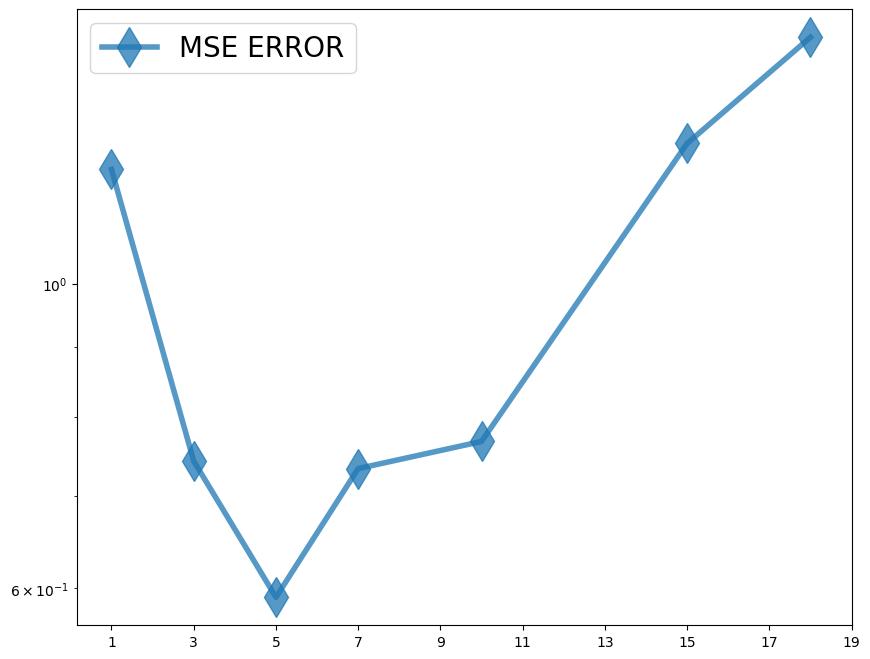

In [41]:
# TODO: totalMSE(d, n) to assess a model of degree d using n-fold cross-validation
n = nFolds
def totalMSE(d, n):
    J = [None] * n
    XtrP = ml.transforms.fpoly(Xtr, d, False)  # Transforming features to polynomial features of degree 'd'
    for iFold in range(n):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(XtrP, Ytr, n, iFold)  # Splitting data for cross-validation
        learner = ml.linear.linearRegress(Xti, Yti)  # Training the model on training data of this fold
        Yhat_yvi = learner.predict(Xvi)  # Get predicted Y value 
        J[iFold] = MSE(Yhat_yvi, Yvi)  # Compute MSE with my Y vs trainingY
    mean = np.mean(J)
    return mean
# TODO: Compute and plot the five-fold cross-validation error for d = 1, 3, 5, 7, 10, 15, 18
f, ax = plt.subplots(1, 1, figsize=(10, 8))
mse = []
degrees = [1, 3, 5, 7, 10, 15, 18]
for d in degrees:
    mse.append(totalMSE(d,n))
print(mse)   
ax.semilogy(degrees, mse, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')
#ax.set_xlim(1.2, 20.5)
#ax.set_ylim(30, 1100)
# Setting the X-ticks manually.
ax.set_xticks(np.arange(1, 20, 2))
ax.legend(fontsize=20, loc=0)
plt.show() 
    
    



**(c) How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the actual test
data (Part 1)? <span style="color: deepskyblue;">(5 points)</span>**






The error using five-fold cross validation increases rapidly from degree of 7 to our highest degree. In Part one, we saw that the there is a clear over-fitting after degree 15, as the MSE drops to almost nothing. In our cross validation this doesnt seem to be such a porblem. 

**(d) Which polynomial degree do you recommend based on five-fold cross-validation error? <span style="color: deepskyblue;">(5 points)</span>**

I would recommend degree 5 to be used for our learner. This is the overall minima, and is also not a zero error. It looks like we have not overfit the data here, and any degree after 5 we see an uptick in error. It is also a simpler model than higher degrees, saving on computational resources. 

**(e) For the degree that you picked in step d, plot (with semilogy ) the cross-validation error as the number of folds is varied from nFolds = 2, 3, 4, 5, 6, 10, 12, 15. What pattern do you observe, and how do you explain why it occurs? <span style="color: deepskyblue;">(15 points)</span>**

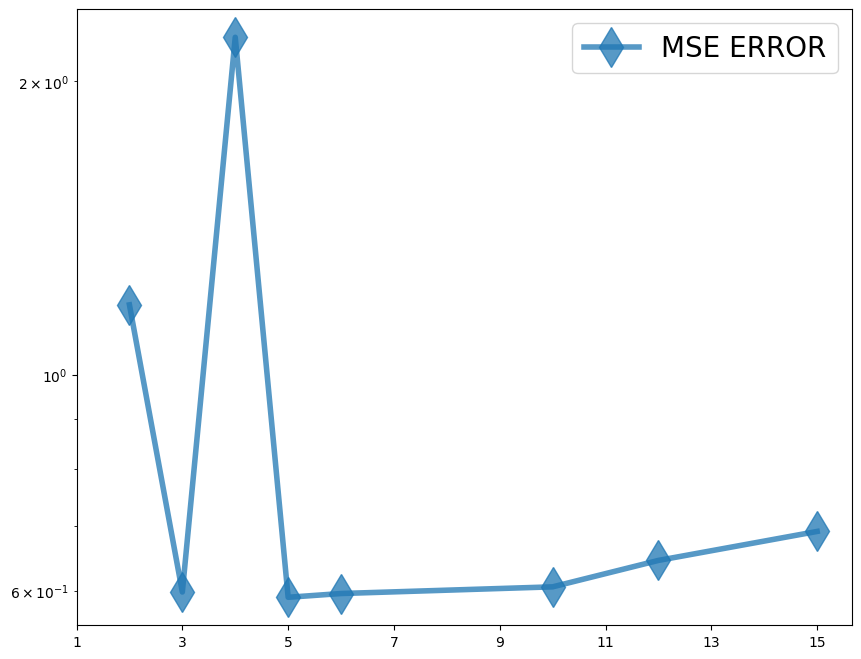

In [37]:
# TODO: Compute and plot cross-validation error for varying number of folds
# choose degree = 5
degree = 5
n_folds_array = [2, 3, 4, 5, 6, 10, 12, 15]
mse = []
# iterating over my array just containing folds, use same logic as above basically
for numFolds in n_folds_array:
    mse.append(totalMSE(degree,numFolds))
f, ax = plt.subplots(1, 1, figsize=(10, 8))
# (x,y) = nFolds, mse for that fold
ax.semilogy(n_folds_array, mse, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')
# Setting the X-ticks manually.
ax.set_xticks(np.arange(1, 16, 2))
ax.legend(fontsize=20, loc=0)
plt.show() 


E) For the degree that you picked in step d, plot (with semilogy ) the cross-validation error as the number of folds is varied from nFolds = 2, 3, 4, 5, 6, 10, 12, 15. What pattern do you observe, and how do you explain why it occurs?
The MSE is lowest where my number of folds is equal to the degree I have chosen. There is large oscillation with folds below my chosen 5, and after, there is a gentle incline comparitively. Im not surprised that 5 yields the lowest error, as k=5 was discussed as a common choice in cross-validation. We talked about that it is not overly complex (doesnt take too much computation time), and is not overly simplistic. In lower number of folds, there just is not enough training data to make an accurate prediction. 

<hr>

# Statement of Collaboration

It is **mandatory** to include a *Statement of Collaboration* in each submission. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. 

I talked to Jake about my MSE function for Part 2, and we did not figure it out! I found that I was forgetting to actually predict a y-value when I went back to your examples. 